Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('Medicalpremium.csv')

In [ ]:
# first 5 rows of the dataframe
insurance_dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
# number of rows and columns
insurance_dataset.shape

(5916, 11)

In [ ]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      5916 non-null   int64
 1   Diabetes                 5916 non-null   int64
 2   BloodPressureProblems    5916 non-null   int64
 3   AnyTransplants           5916 non-null   int64
 4   AnyChronicDiseases       5916 non-null   int64
 5   Height                   5916 non-null   int64
 6   Weight                   5916 non-null   int64
 7   KnownAllergies           5916 non-null   int64
 8   HistoryOfCancerInFamily  5916 non-null   int64
 9   NumberOfMajorSurgeries   5916 non-null   int64
 10  PremiumPrice             5916 non-null   int64
dtypes: int64(11)
memory usage: 508.5 KB


Categorical Features:
- Diabetes
- BloodPressureProblems
- AnyTransplants
- AnyChronicDiseases
- KnownAllergies
- HistoryOfCancerInFamily
- NumberOfMajorSurgeries

In [ ]:
# checking for missing values
insurance_dataset.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

Data Analysis

In [ ]:
# statistical Measures of the dataset
insurance_dataset.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.957468,0.493580,0.499053,0.229518,0.384659,10.093886,14.259065,0.410864,0.322217,0.748888,6245.543002
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


<ipython-input-15-c6144d9c8019>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['Age'])


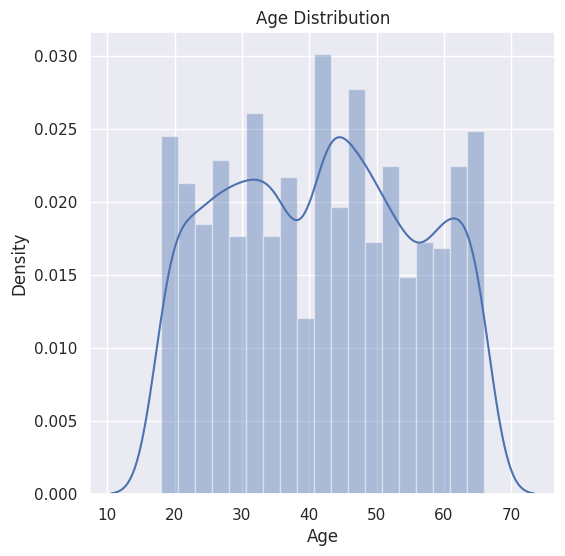

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['Age']) #distribution plt
plt.title('Age Distribution')
plt.show()

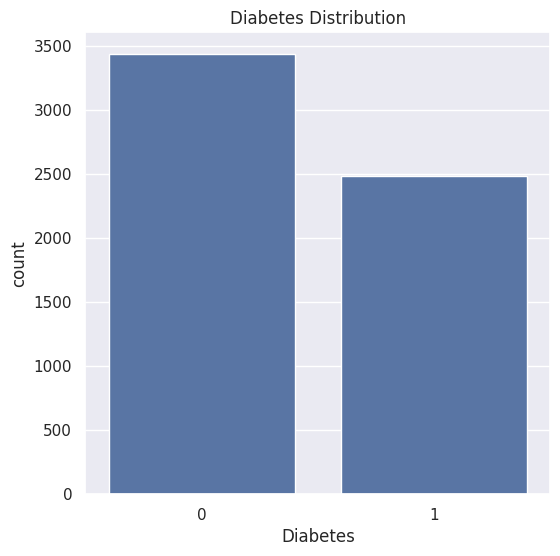

In [ ]:
# Diabetes column
plt.figure(figsize=(6,6))
sns.countplot(x='Diabetes', data=insurance_dataset) #count plt
plt.title('Diabetes Distribution')
plt.show()

In [ ]:
insurance_dataset['Diabetes'].value_counts()

Diabetes
0    3432
1    2484
Name: count, dtype: int64

<ipython-input-19-f20755eb5d98>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['Height'])


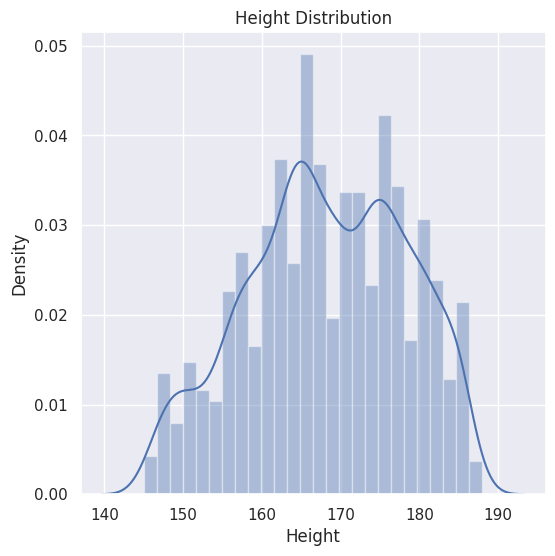

In [ ]:
# Height distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['Height'])
plt.title('Height Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

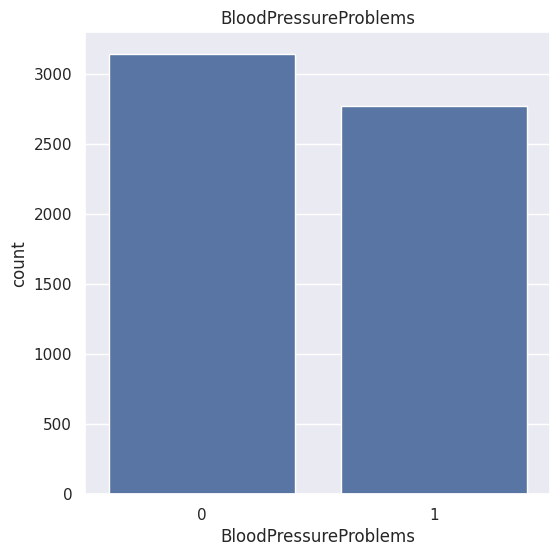

In [ ]:
# BloodPressureProblems column
plt.figure(figsize=(6,6))
sns.countplot(x='BloodPressureProblems', data=insurance_dataset)
plt.title('BloodPressureProblems')
plt.show()

In [ ]:
insurance_dataset['BloodPressureProblems'].value_counts()

BloodPressureProblems
0    3144
1    2772
Name: count, dtype: int64

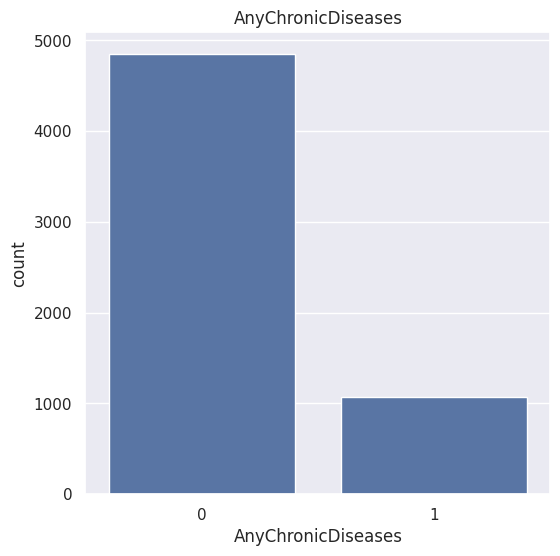

In [ ]:
# AnyChronicDiseases column
plt.figure(figsize=(6,6))
sns.countplot(x='AnyChronicDiseases', data=insurance_dataset)
plt.title('AnyChronicDiseases')
plt.show()

In [ ]:
insurance_dataset['AnyChronicDiseases'].value_counts()

AnyChronicDiseases
0    4848
1    1068
Name: count, dtype: int64

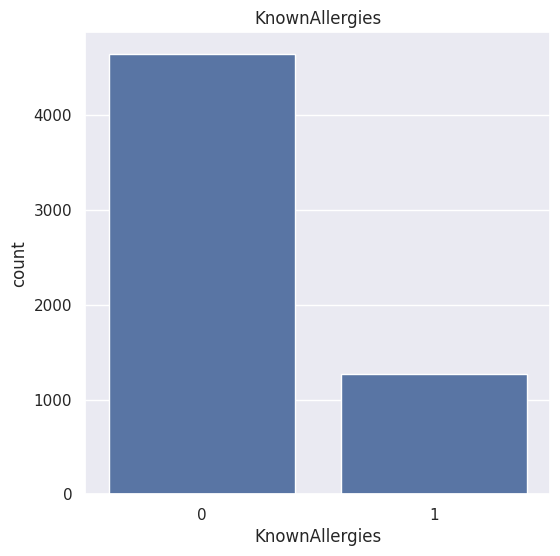

In [ ]:
# KnownAllergies column
plt.figure(figsize=(6,6))
sns.countplot(x='KnownAllergies', data=insurance_dataset)
plt.title('KnownAllergies')
plt.show()

In [ ]:
insurance_dataset['KnownAllergies'].value_counts()

KnownAllergies
0    4644
1    1272
Name: count, dtype: int64

<ipython-input-27-640740ce8355>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['Weight'])


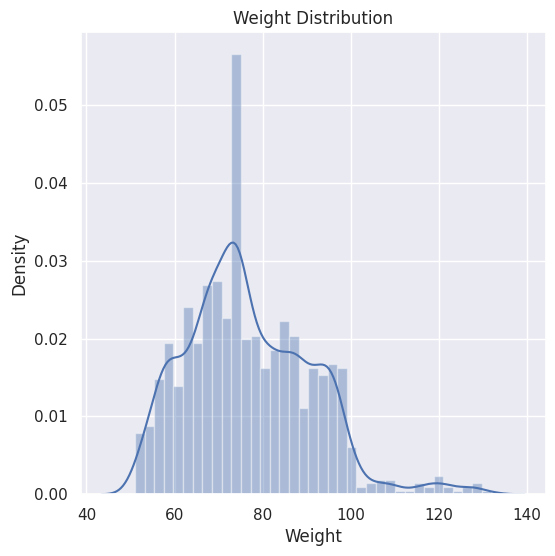

In [ ]:
# distribution of Weight
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['Weight'])
plt.title('Weight Distribution')
plt.show()

Splitting the Features and Target

In [ ]:
X = insurance_dataset.drop(columns='PremiumPrice', axis=1)
Y = insurance_dataset['PremiumPrice']

In [ ]:
print(X)

      Age  Diabetes  BloodPressureProblems  AnyTransplants  \
0      45         0                      0               0   
1      60         1                      0               0   
2      36         1                      1               0   
3      52         1                      1               0   
4      38         0                      0               0   
...   ...       ...                    ...             ...   
5911   18         0                      0               0   
5912   64         1                      1               0   
5913   56         0                      1               0   
5914   47         1                      1               0   
5915   21         0                      0               0   

      AnyChronicDiseases  Height  Weight  KnownAllergies  \
0                      0     155      57               0   
1                      0     180      73               0   
2                      0     158      59               0   
3              

In [ ]:
print(Y)

0       25000
1       29000
2       23000
3       28000
4       23000
        ...  
5911    15000
5912    28000
5913    29000
5914    39000
5915    15000
Name: PremiumPrice, Length: 5916, dtype: int64


Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(5916, 10) (4732, 10) (1184, 10)


**Model Training**

Linear Regression

In [ ]:
# loading the Linear Regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.6519745688249812


In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.6053022345260377


Building a Predictive System

In [ ]:
input_data = (21,0,0,0,0,178,68,0,0,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is ', prediction[0])

[16064.99316229]
The insurance cost is  16064.993162293526


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
